In [189]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import scale
from scipy.interpolate import interp1d
import sys, os

# load data
root = "../data_cut_back_front"

filename_list = []
for path, subdirs, files in os.walk(root):
    for name in files:
        filename_list.append(os.path.join(path, name))

# 0 ~ 2 -> acx ~ acz 
# 3 ~ 5 -> gx ~ gz
SELECT_AXE = [0,1,2,3,4,5]

AXE_INFO = {
    0 : ["acx", "r"],
    1 : ["acy", "g"],
    2 : ["acz", "b"],
    3 : ["gx", "c"],
    4 : ["gy", "m"],
    5 : ["gz", "y"],
}

In [229]:
# get data from samples and stretch data


dda = []
dda_nomal = []
dda_stretch = []

duck = []
duck_nomal = []
duck_stretch = []

data
for filename in filename_list:

    sample_size_fit = 50

    data_raw = [list(map(str, i.strip("\n").split(" "))) for i in open(filename)]
    data = np.array(data_raw).astype(float)

    # scale
    data_norm = scale(data)

    acx = data_norm[:,0]
    acy = data_norm[:,1]
    acz = data_norm[:,2]

    gx = data_norm[:,3]
    gy = data_norm[:,4]
    gz = data_norm[:,5]

    x = np.linspace(0, data.shape[0], data.shape[0])
    f_acx = interp1d(x, acx)
    f_acy = interp1d(x, acy)
    f_acz = interp1d(x, acz)

    f_gx = interp1d(x, gx)
    f_gy = interp1d(x, gy)
    f_gz = interp1d(x, gz)

    xnew = np.linspace(0, data.shape[0], sample_size_fit)

    acx_stretch = f_acx(xnew)
    acy_stretch = f_acy(xnew)
    acz_stretch = f_acz(xnew)

    gx_stretch = f_gx(xnew)
    gy_stretch = f_gy(xnew)
    gz_stretch = f_gz(xnew)
    
    stretch_list = np.transpose([acx_stretch, acy_stretch, acz_stretch, gx_stretch, gy_stretch, gz_stretch])

    if 'dda' in filename:
        dda.append(data)
        dda_nomal.append(data_norm)
        dda_stretch.append(stretch_list)
    else :
        duck.append(data)
        duck_nomal.append(data_norm)
        duck_stretch.append(stretch_list)

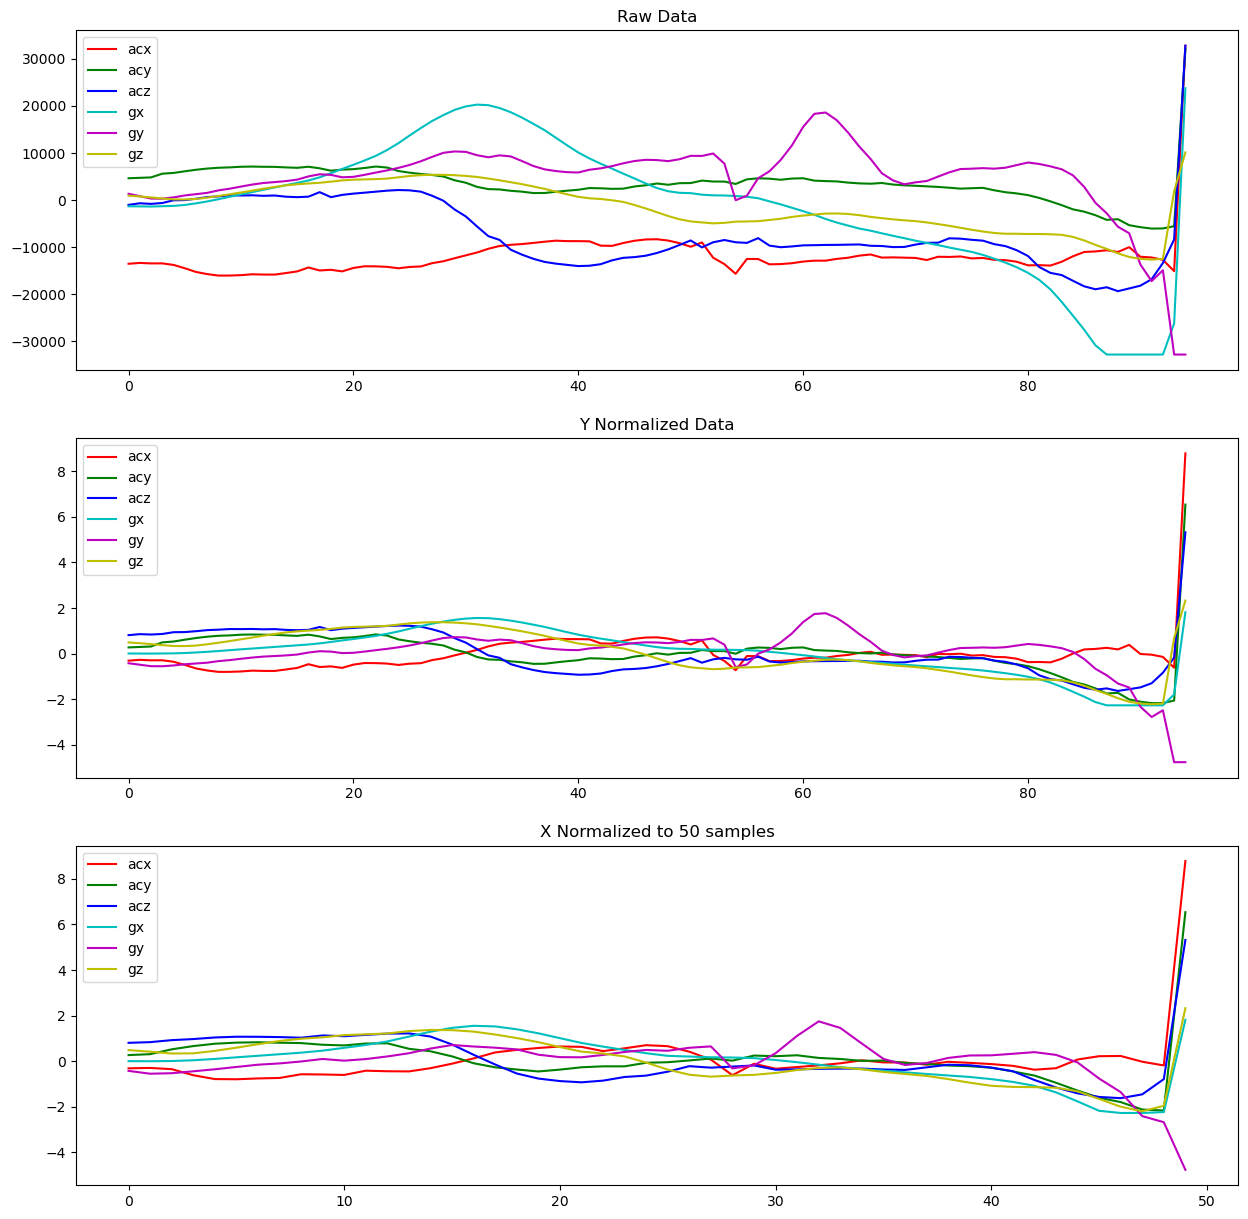

In [261]:
f, axarr = plt.subplots(3, figsize=(15, 15))
SELECT_AXE = [0,1,2,3,4,5]
plt.title("dda all data")

axarr[0].set_title("Raw Data")
for i in range(2,3):
    for axe in SELECT_AXE:
        if i == 2:
            axarr[0].plot(dda[i][:,axe], color=AXE_INFO[axe][1], label=AXE_INFO[axe][0])
        else :
            axarr[0].plot(dda[i][:,axe], color=AXE_INFO[axe][1])
axarr[0].legend(loc=2)


axarr[1].set_title("Y Normalized Data")
for i in range(2,3):
    for axe in SELECT_AXE:
        if i == 2:
            axarr[1].plot(dda_nomal[i][:,axe], color=AXE_INFO[axe][1], label=AXE_INFO[axe][0])
        else :
            axarr[1].plot(dda_nomal[i][:,axe], color=AXE_INFO[axe][1])
axarr[1].legend(loc=2)

axarr[2].set_title("X Normalized to 50 samples")
for i in range(2,3):
    for axe in SELECT_AXE:
        if i == 2:
            axarr[2].plot(dda_stretch[i][:,axe], color=AXE_INFO[axe][1], label=AXE_INFO[axe][0])
        else :
            axarr[2].plot(dda_stretch[i][:,axe], color=AXE_INFO[axe][1])
axarr[2].legend(loc=2)

plt.show()

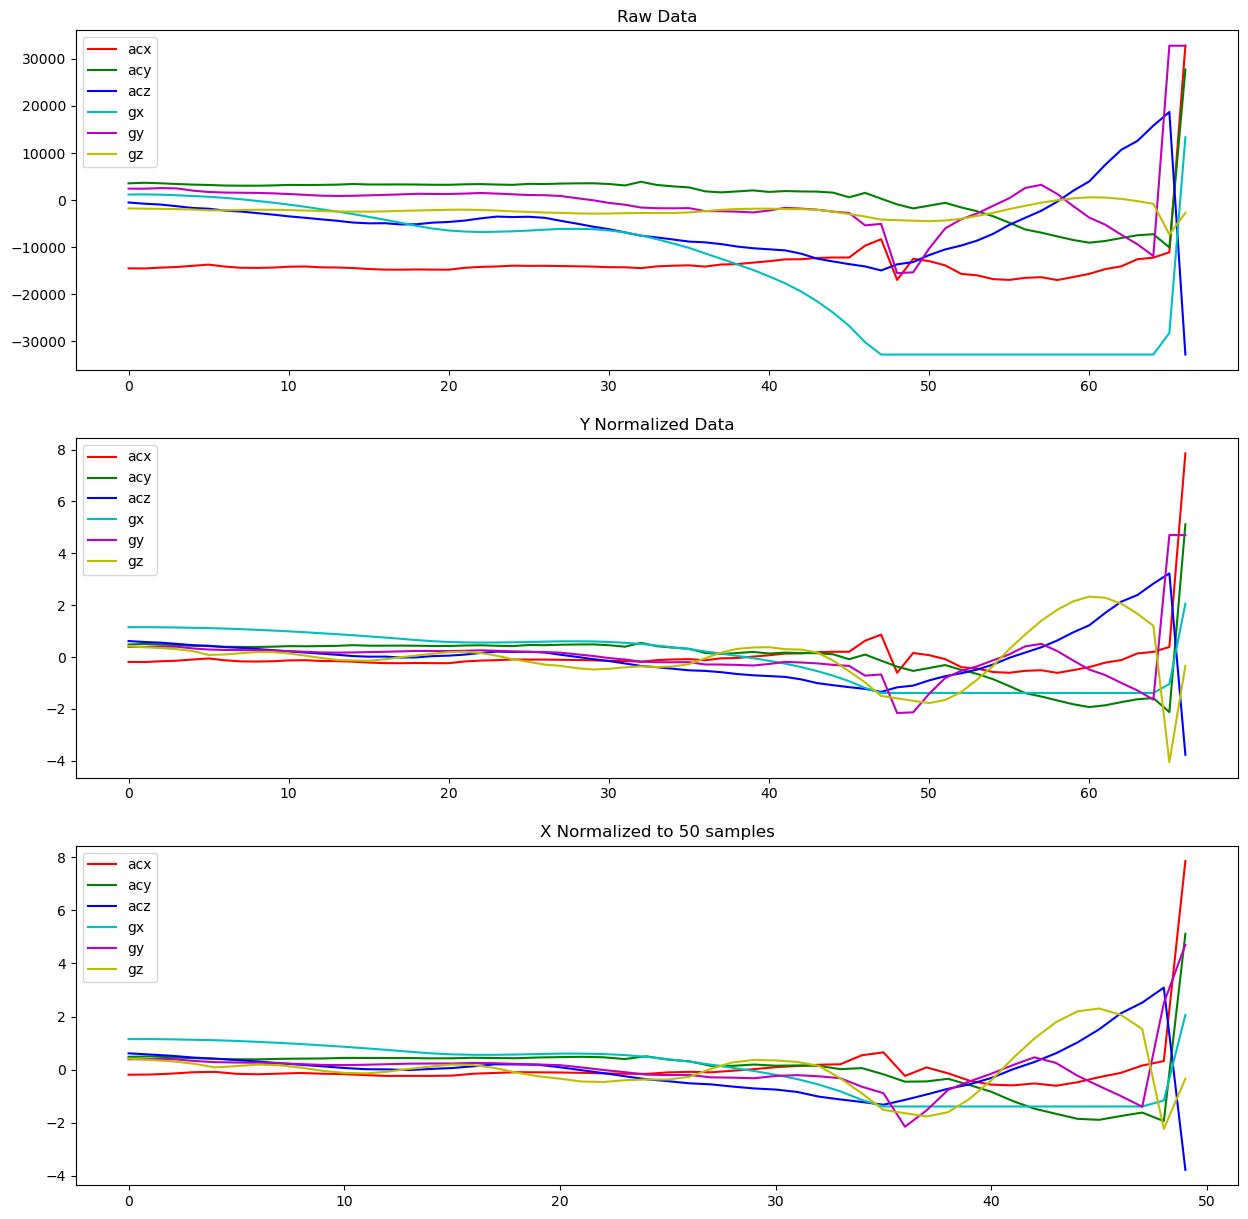

In [262]:
# duck all
f, axarr = plt.subplots(3, figsize=(15, 15))
SELECT_AXE = [0, 1,2,3,4,5]

axarr[0].set_title("Raw Data")
for i in range(2,3):
    for axe in SELECT_AXE:
        if i == 2:
            axarr[0].plot(duck[i][:,axe], color=AXE_INFO[axe][1], label=AXE_INFO[axe][0])
        else :
            axarr[0].plot(duck[i][:,axe], color=AXE_INFO[axe][1])
axarr[0].legend(loc=2)


axarr[1].set_title("Y Normalized Data")
for i in range(2,3):
    for axe in SELECT_AXE:
        if i == 2:
            axarr[1].plot(duck_nomal[i][:,axe], color=AXE_INFO[axe][1], label=AXE_INFO[axe][0])
        else :
            axarr[1].plot(duck_nomal[i][:,axe], color=AXE_INFO[axe][1])
axarr[1].legend(loc=2)

axarr[2].set_title("X Normalized to 50 samples")
for i in range(2,3):
    for axe in SELECT_AXE:
        if i == 2:
            axarr[2].plot(duck_stretch[i][:,axe], color=AXE_INFO[axe][1], label=AXE_INFO[axe][0])
        else :
            axarr[2].plot(duck_stretch[i][:,axe], color=AXE_INFO[axe][1])
axarr[2].legend(loc=2)

plt.show()